<center><h1> Noise PSD </h1> </center>

Let's say we are looking at noise from a detector which is sensitive in the band [10 to 1000 ] Hz!  </br>
We also assume the noise is Gaussian and Statioanry. </br>
Here we compute the PSD of a signle long time series by dividing into smaller segments. </br>
This method is called Welch method for computing PSD for more detail https://www.osti.gov/servlets/purl/5688766/

Algorithm: </br>

* Since 1000 Hz is our maximum frequency we could sample the data at 2K or 4K, we use 4K=1024*4 sampling rate
* Lowest frequecny we want is 10 Hz, lets push that to 1 Hz. This means we can go upto 1 sec or larger timeseries for the smaller sigment
* The detector noise might not be stationary for long period of time (or the order few horus). we take 4096 sec long data.

Here is the summary </br>

Take data of 4096 sec long devide it equally 128 segnments of of 64 sec data  with 50% overlap</br>
We take FFT of each segment, apply hamming filter reduce the effect due to making segment and take overlap to reduce the effect of filter! </br>
Then take the mean/median  for each frequency bin to get PSD


In [21]:
import numpy as np
import matplotlib.pyplot as plt
sps=1024*4     # 4 K sampling
Tmax=4096.0    # Length of time segment 4096 seconds long
Tseg=64.0      # Length of smaller segment 64 second
Nsegs=Tmax/Tseg
Ns=int(Tmax*sps)
Ms=int(Tseg*sps)
print(Ns, Ms)
Nfft=Ms//2

16777216 262144


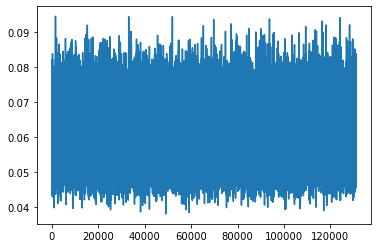

In [28]:
psd=np.zeros(Nfft)
noise=np.random.randn(Ns)
for ii in np.arange(0,Ns-Ms,Nfft) :
    x=noise[ii:ii+Ms]
    fx=np.fft.fft(x);
    psd=psd+np.abs(fx[0:Nfft])**2
psd=2*psd/sps/Ms
plt.plot(psd)

In [3]:
import  pycbc.catalog
c = pycbc.catalog.Catalog(source='gwtc-1')